Hi all ,

I will use this kernel as an opportunity to explore various tricks to present data in better way(either by graph or by meaningful tables) . I will try my level best to share my domain knowledge on Healthcare industry to keep you interested thourghout this notebook

We have enough data here to analyze and find interesting patterns to understand data from year 2014,2015 and 2016.
Lets start our journey with BenefitsCostSharing and I will handle rest of the dataset in further sections of this kernel .
This kernel will remain WIP until  I manage to answer all the questions asked in the overview section.

**1. BenefitsCostSharing.csv**     
*Lets start our analysis with above dataset  to answer How do plan rates and benefits vary across states?*


**2.BusinessRules.csv**

**3.Crosswalk2015.csv**

**4.Crosswalk2016.csv**

**5.Network.csv**

**6.PlanAttributes.csv**

**7.Rate.csv**

**8.ServiceArea.csv**

**9.database.sqlite**

**10.hashes.txt**

**11.raw**



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

BenefitsCostSharing.csv
BusinessRules.csv
Crosswalk2015.csv
Crosswalk2016.csv
Network.csv
PlanAttributes.csv
Rate.csv
ServiceArea.csv
database.sqlite
hashes.txt
raw



Lets gather all the required tools to tame this Big dataset  

In [2]:
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns 
import numpy as np
import pandas as pd
import numpy as np
import random as rnd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve
%matplotlib inline

**Importing BenefitsCostSharing dataset**

In [3]:
CostShare_df = pd.read_csv("../input//BenefitsCostSharing.csv")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (3,6,9,10,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.



Lets take a look at how this dataset looks

In [4]:
CostShare_df.head(n=10)

,BenefitName,BusinessYear,CoinsInnTier1,CoinsInnTier2,CoinsOutofNet,CopayInnTier1,CopayInnTier2,CopayOutofNet,EHBVarReason,Exclusions,...,LimitUnit,MinimumStay,PlanId,QuantLimitOnSvc,RowNumber,SourceName,StandardComponentId,StateCode,StateCode2,VersionNum
0,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,68,HIOS,21989AK0010001,AK,AK,6
1,Dental Check-Up for Children,2014,20%,NaN,20%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,Visit(s) per 6 Months,NaN,21989AK0010001-00,Yes,104,HIOS,21989AK0010001,AK,AK,6
2,Basic Dental Care - Child,2014,40%,NaN,40%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,110,HIOS,21989AK0010001,AK,AK,6
3,Orthodontia - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Additional EHB Benefit,NaN,...,NaN,NaN,21989AK0010001-00,NaN,111,HIOS,21989AK0010001,AK,AK,6
4,Major Dental Care - Child,2014,50%,NaN,50%,No Charge,NaN,No Charge,Substantially Equal,NaN,...,NaN,NaN,21989AK0010001-00,NaN,112,HIOS,21989AK0010001,AK,AK,6
5,Basic Dental Care - Adult,2014,40%,NaN,40%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,113,HIOS,21989AK0010001,AK,AK,6
6,Orthodontia - Adult,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21989AK0010001-00,NaN,114,HIOS,21989AK0010001,AK,AK,6
7,Major Dental Care - Adult,2014,50%,NaN,50%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-00,Yes,115,HIOS,21989AK0010001,AK,AK,6
8,Accidental Dental,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21989AK0010001-00,NaN,118,HIOS,21989AK0010001,AK,AK,6
9,Routine Dental Services (Adult),2014,20%,NaN,20%,No Charge,NaN,No Charge,Above EHB,NaN,...,Dollars per Year,NaN,21989AK0010001-01,Yes,68,HIOS,21989AK0010001,AK,AK,6


Lets find out which columns do not have null values and lets fill out empty records from our dataset 

In [5]:
# Fill empty and NaNs values with NaN
CostShare_df = CostShare_df.fillna(np.nan)

# Check for Null values
CostShare_df.isnull().sum()

BenefitName                  0
BusinessYear                 0
CoinsInnTier1          1113847
CoinsInnTier2          4571587
CoinsOutofNet          1113847
CopayInnTier1          1113847
CopayInnTier2          4571587
CopayOutofNet          1113849
EHBVarReason           3020737
Exclusions             4572247
Explanation            4075700
ImportDate                   0
IsCovered               215980
IsEHB                  1817362
IsExclFromInnMOOP       983986
IsExclFromOonMOOP       982626
IsStateMandate         4250463
IsSubjToDedTier1       2465877
IsSubjToDedTier2       2466054
IssuerId                     0
IssuerId2                    0
LimitQty               4360725
LimitUnit              4360539
MinimumStay            5031681
PlanId                       0
QuantLimitOnSvc        3264532
RowNumber                    0
SourceName                   0
StandardComponentId          0
StateCode                    0
StateCode2                   0
VersionNum                   0
dtype: i

Lets check how many records we have in our dataset. 
I have chosen BenefitName field here since it contains no null values and its name is self explnatory that it is related to benefit plan sold in USA healthcare

In [6]:
print ('Total records in file:%d' %CostShare_df.BenefitName.count())
print ('Unique benefits pesent in the file:%d' %CostShare_df.BenefitName.nunique())

Total records in file:5048408
Unique benefits pesent in the file:861


So we have total 861 type of different plans sold in USA in the year 2014 to 2016

In [7]:
### lets Summarize data
# Summary and statistics
CostShare_df.describe()

,BusinessYear,IssuerId,IssuerId2,LimitQty,MinimumStay,RowNumber,VersionNum
count,5.048408e+06,5.048408e+06,5.048408e+06,687683.000000,16727.000000,5.048408e+06,5.048408e+06
mean,2.015127e+03,5.220360e+04,5.220360e+04,142.399374,47.937048,9.839018e+01,7.637094e+00
std,7.563664e-01,2.592498e+04,2.592498e+04,1723.372817,5.892297,2.177890e+01,3.803627e+00
min,2.014000e+03,1.004600e+04,1.004600e+04,1.000000,5.000000,6.100000e+01,1.000000e+00
25%,2.015000e+03,3.253600e+04,3.253600e+04,1.000000,48.000000,8.000000e+01,5.000000e+00
50%,2.015000e+03,4.839600e+04,4.839600e+04,20.000000,48.000000,9.900000e+01,7.000000e+00
75%,2.016000e+03,7.498000e+04,7.498000e+04,40.000000,48.000000,1.170000e+02,9.000000e+00
max,2.016000e+03,9.996900e+04,9.996900e+04,75000.000000,90.000000,1.560000e+02,2.400000e+01


Data produced above will not make sense at all for few features here.

But features like  Minimum Stay point out that on an average minimum stay of 47 days is covered through benefit plans. 

LimitQty does give out significant information but it is too early to make comment on it . since we still dont know how many plans are indvidual or family oriented and how premium dollar amount paid varies for these plans, so we may have to segragate the data to have better intuition on this feature.

Lets analyze all Features in one go using below enumerate function. 
We can take help of these stattistics to proceed.

In [8]:
v_features = CostShare_df.ix[:,0:32].columns
for i, cn in enumerate(CostShare_df[v_features]):
    print(i,cn)
    print(CostShare_df[cn].describe())
    print("-"*40)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



0 BenefitName
count                 5048408
unique                    861
top       Orthodontia - Adult
freq                    77377
Name: BenefitName, dtype: object
----------------------------------------
1 BusinessYear
count    5.048408e+06
mean     2.015127e+03
std      7.563664e-01
min      2.014000e+03
25%      2.015000e+03
50%      2.015000e+03
75%      2.016000e+03
max      2.016000e+03
Name: BusinessYear, dtype: float64
----------------------------------------
2 CoinsInnTier1
count                              3934561
unique                                 115
top       20% Coinsurance after deductible
freq                                673204
Name: CoinsInnTier1, dtype: object
----------------------------------------
3 CoinsInnTier2
count             476821
unique                37
top       Not Applicable
freq              185524
Name: CoinsInnTier2, dtype: object
----------------------------------------
4 CoinsOutofNet
count     3934561
unique         60
top          100%

Lets Analyze which benefit type topping the chart in a given business year 

In [9]:
CostShare_df[["BusinessYear","BenefitName"]].groupby('BusinessYear').describe()

BenefitName                                         
                   count unique                        top   freq
BusinessYear                                                     
2014             1164869    496  Major Dental Care - Child  18719
2015             2079286    517        Orthodontia - Adult  31269
2016             1804253    429        Orthodontia - Adult  27389

Lets Analyze benefit penetration statewise . Below code will help us to get the intermediate variables required to plot the data

In [10]:
CostShare_df[["StateCode","BenefitName"]].groupby('StateCode').count().sort_values("BenefitName")
Unique_State = CostShare_df.StateCode.unique()
benefitarray = []

for state in Unique_State:
    state_benefit =  len(CostShare_df[CostShare_df["StateCode"] == state])    
    benefitarray.append(state_benefit)   

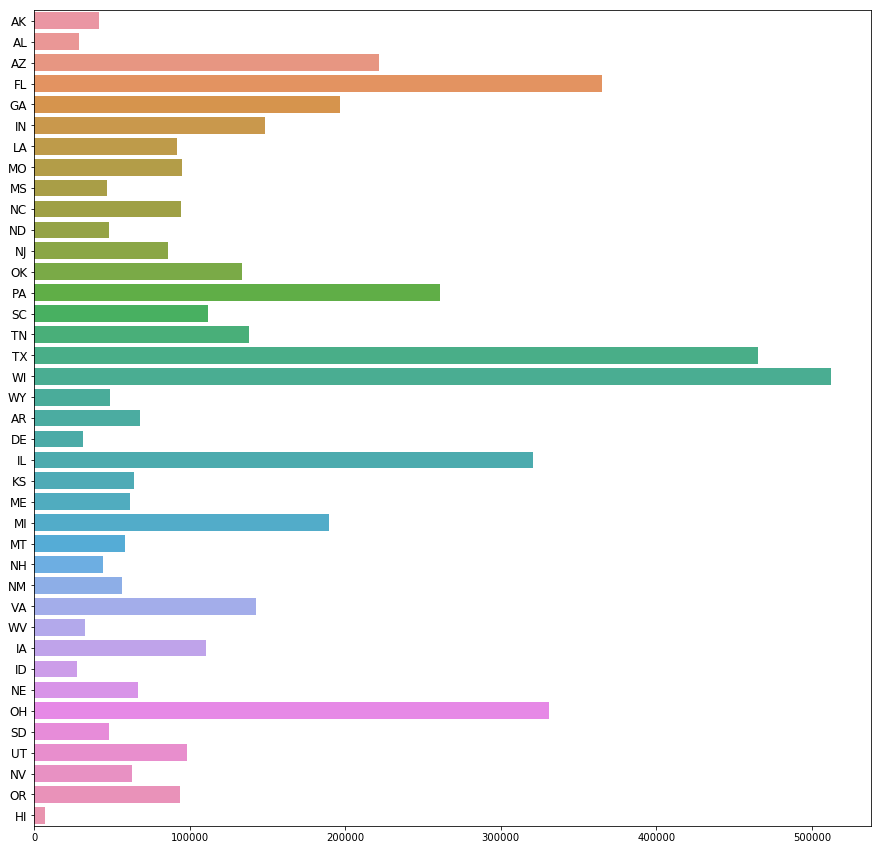

"\nax.set_xticks(x)\n# Set ticks labels for x-axis\nax.set_xticklabels(Unique_State, rotation='vertical', fontsize='small')\nplt.show()\n"

In [11]:

f, ax = plt.subplots(figsize=(15, 15)) 
ax.set_yticklabels(Unique_State, rotation='horizontal', fontsize='large')
g = sns.barplot(y = Unique_State,x=benefitarray)
plt.show()

# Set number of ticks for x-axis
"""
ax.set_xticks(x)
# Set ticks labels for x-axis
ax.set_xticklabels(Unique_State, rotation='vertical', fontsize='small')
plt.show()
"""

Grapth produced above may become diffficult to read since it is not in sorted order of benefit plans sold statewise. Lets add few lines of code again to get desired graphical presentation to read benefitplan sold in descending order statewise.

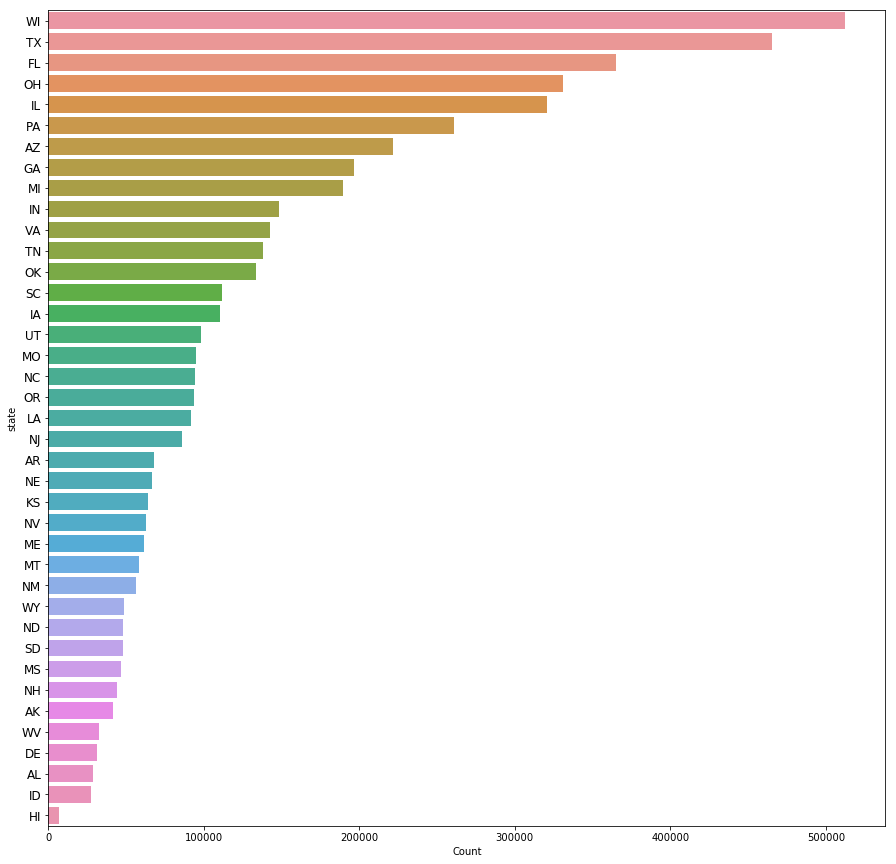

In [12]:

df = pd.DataFrame(
    {'state': Unique_State,
     'Count' : benefitarray
     })

df = df.sort_values("Count", ascending=False).reset_index(drop=True)

f, ax = plt.subplots(figsize=(15, 15)) 
ax.set_yticklabels(df.state, rotation='horizontal', fontsize='large')
g = sns.barplot(y = df.state, x= df.Count)
plt.show()



Lets use Choropleth plot to visualize above data on USA map. 
Zoom in or Zoom out on the plot and put your cursor on the state to see the information about the state. 

In [13]:
data = dict(type = 'choropleth',
           locations = df['state'],
           locationmode = 'USA-states',
           colorscale = 'YIOrRed',
            text = df['state'],
            marker = dict (line = dict(color = 'rgb(255,255,255)',width=2)),
           z = df['Count'],
           colorbar = {'title':'No of Benefit plans'})

layout = dict(title = 'Benefit plan spread across state',
         geo=dict(scope = 'usa',showlakes = True,lakecolor='rgb(85,173,240)')) 

choromap2 = go.Figure(data = [data],layout=layout)
iplot(choromap2)

Now we are in a much better condition to draw conclusion that state WI is larger consumer of healthcare services. 
We may have to consider the current population of each state and above stats(graph)to decide our strategy to cover more people accordingly.

Lets have a one more look at which benefit plan is consumed more by the population of the respective state.

In [14]:
CostShare_df[["StateCode","BenefitName"]].groupby('StateCode').describe()

BenefitName                                              
                count unique                              top  freq
StateCode                                                          
AK              41320     84        Major Dental Care - Adult   720
AL              28417    115              Orthodontia - Child   653
AR              68064     93              Orthodontia - Adult  1077
AZ             221612    195  Routine Dental Services (Adult)  3345
DE              31370    110                Accidental Dental   602
FL             364742    194        Basic Dental Care - Child  5130
GA             196579    151              Orthodontia - Adult  2893
HI               6741     76        Major Dental Care - Child   110
IA             110221    104                Accidental Dental  1727
ID              27313     71  Routine Dental Services (Adult)   447
IL             320533    157                Accidental Dental  4299
IN             148531    109        Major Dental Care - Adult  2347
KS              64279     82     Dental Check-Up for Children  1087
LA              91816    125              Orthodontia - Adult  1491
ME              61834     99              Orthodontia - Adult   975
MI             189225    205        Major Dental Care - Child  3248
MO              95152    127        Major Dental Care - Adult  1577
MS              46895    104  Routine Dental Services (Adult)   725
MT              58132     75     Dental Check-Up for Children  1049
NC              94290     98        Major Dental Care - Adult  1537
ND              48269     77     Dental Check-Up for Children   974
NE              66935     90     Dental Check-Up for Children  1238
NH              44305     98        Basic Dental Care - Adult   707
NJ              86107    100              Orthodontia - Child  1357
NM              56669     78     Dental Check-Up for Children   828
NV              62743    121                Accidental Dental   930
OH             331045    193              Orthodontia - Child  5092
OK             133639     83                Accidental Dental  2136
OR              93502    123              Orthodontia - Adult  1344
PA             260866    157        Major Dental Care - Child  4208
SC             111907     85                Accidental Dental  1817
SD              47730     79     Dental Check-Up for Children   843
TN             138154    129  Routine Dental Services (Adult)  2073
TX             465164    180        Major Dental Care - Child  6441
UT              98421    101                Accidental Dental  1527
VA             142236    145        Basic Dental Care - Adult  2256
WI             512587    146              Orthodontia - Adult  7135
WV              32638     77        Basic Dental Care - Child   625
WY              48425     92     Dental Check-Up for Children   807


Lets understanf what is Copay and Coinsurance here along with In network and Out of network since we will be dealing with these features.

Copay            :- Copayment is a payment defined in an insurance policy and paid by an insured person each time a medical service is accessed.

**Additional Information on Deductible to understand Coinsurance better**
 
Deductible :-   suppose you are in a calender year 2017 , and your policy says you must spend dollar 5000 first to start availing the benefits from you policy . Lets assume you spent dollar5000 by month of March. now Coinsurance plays a major role after that . (Note:- Coinsurance is expressed in percentage)
 
Coinsurance :-  After you have spent your deductible and again you are in need to avail medical service this time you visit doctor again , you pay your fixed copay amount but rest other expenses will be shared by your Payer (company from which you purchased your plan). suppose you have coninsurance of 20%  and your total cost is 100$ , so you will spend $20 and remaining 80% will i,e. dollar 80 will paid by payer. 

**One more additional concept to make you understand how long we should follow this Coinsurance**
 
Out of pocket limit :- We have this limit to make your Helathcare payer take 100% 
resonsibility of of your medical services. Suppose you keep on paying coinsurance till some month for the calender year 2017 . Suppose by end month October you spent  dollar 10000 (your Deductible spent till march from above example + Copay paid till date from jan or start of calender year + Coinsurance you started after march i.e. after exhausting your deductible till march ) 

Out of poclet $10000   < (Deductible + Copay + Coinsurance )
If this condition gets satisfied your Healthcare (Payer) pays 100% 
of your medical expense after that for that calender year .

All these benefits resets again back to what they were in previous year for new calender year and you start paying your deductibles and coinsurance again :)  Unless you have renewal plans in effect.

In Network    :-  Avaialing medical services from the hospitals and  labs who are associated with your healthcare Payers. 

Our Network :- Avaialing medical services from the hospitals and  labs who are not associated with your healthcare Payers.

benefit plan costs are mostly higher for out of network services than benefit plan cost of in netwrok services.


Small help from google to know what is Tier based Copay and Coinsurance. read below lines on different tiers available.

Tier 1 always carries the lowest copay and typically applies only to generic drugs. Tier 2 is often for "preferred" brand-name drugs. Tier 3 is often for "non-preferred" brand names. Tier 4 is for usually for "specialty" drugs, meaning very expensive ones and those used to treat rare conditions.

In [15]:

#Coinsurance
print('Coinsurance details')
print(CostShare_df.CoinsInnTier1.unique())
print('*'*50)
print(CostShare_df.CoinsInnTier2.unique())
print('*'*50)
print(CostShare_df.CoinsOutofNet.unique())
print('_'*50)
print('_'*50)

"""Copay
print('Copay details')
print(CostShare_df.CopayInnTier1.unique())
print('*'*50)
print(CostShare_df.CopayInnTier2.unique())
print('*'*50)
print(CostShare_df.CopayOutofNet.unique())
print('_'*50)
print('_'*50)
"""


Coinsurance details
['20%' '40%' '50%' nan '0%' '30%' '50% Coinsurance after deductible'
 '100% Coinsurance after deductible' '80% Coinsurance after deductible'
 'No Charge' '20% Coinsurance after deductible'
 '40% Coinsurance after deductible' '30% Coinsurance after deductible'
 '60% Coinsurance after deductible' 'No Charge after deductible'
 '45% Coinsurance after deductible' '65% Coinsurance after deductible'
 '100%' '15%' '45%' '35%' '0% Coinsurance after deductible'
 '70% Coinsurance after deductible' '10% Coinsurance after deductible'
 '10%' '35% Coinsurance after deductible'
 '15% Coinsurance after deductible' '5% Coinsurance after deductible' '$0'
 '25%' '65%' '25% Coinsurance after deductible' '5%' '60%' '13%' '18%'
 '18% Coinsurance after deductible' '21%' '55%'
 '55% Coinsurance after deductible' '16% Coinsurance after deductible'
 '9% Coinsurance after deductible' '3% Coinsurance after deductible' '80%'
 '90%' '12%' '33%' '90% Coinsurance after deductible'
 '85% Coinsurance

"Copay\nprint('Copay details')\nprint(CostShare_df.CopayInnTier1.unique())\nprint('*'*50)\nprint(CostShare_df.CopayInnTier2.unique())\nprint('*'*50)\nprint(CostShare_df.CopayOutofNet.unique())\nprint('_'*50)\nprint('_'*50)\n"

The problem with above output is , we are not able to understand the spread of the data among the population 
and we need to present this data either by gaussian distribution grapths or frequency table. We may need to modify this data a bit to get what we want.

Lets write some code to get rid of the texts written after Coinsurance percentage like 'Coinsurance after deductible'
As I have already explained when Coinsurance is used , this extra text is not required now. Simillrly look for other text which can be removed so that we will left with numbers for better analysis.

In [16]:

CoinsInnTier1 = []
YearBusiness = []
StateCode = []
CoinsInnTier1_real = np.asarray(CostShare_df.CoinsInnTier1)
            
for i, cn in enumerate(CoinsInnTier1_real):
       if (str(cn) == 'nan' or str(cn) == '$0' or str(cn) == 'Not Applicable') :
             continue     
       else :
             if  cn.replace("%","").strip().split(' ')[0] != 'No' :   
                 CoinsInnTier1.append(cn.replace("%","").strip().split(' ')[0])
                 YearBusiness.append(CostShare_df.BusinessYear[i])
                 StateCode.append(CostShare_df.StateCode[i])


Differet ways to get Top frequent Coinsurance 
1) using Value_counts method
2) write complex function

In [17]:
# 1) use Value_counts method
CoinsInnTier1
CoinsInnTier1 = pd.to_numeric(CoinsInnTier1, errors='coerce')
Codf = pd.DataFrame(
    {'Coinsurance1': CoinsInnTier1,
      'YearBusiness' : YearBusiness,
      'StateCode' : StateCode
     })
Codf['Coinsurance1'].value_counts().head(5)

0     872967
20    699602
30    353429
50    221323
10    208094
Name: Coinsurance1, dtype: int64

In [18]:
Codf.groupby('YearBusiness').sum()

,Coinsurance1
YearBusiness,
2014,11196497
2015,18985158
2016,16426782


In [19]:
# 2) write complex function

Coinsarray = []

Unique_Coinsurance = Codf.Coinsurance1.unique()
for Coinsurance in Unique_Coinsurance:
    Freq_Coinsurance =  len(Codf[Codf["Coinsurance1"] == Coinsurance])    
    Coinsarray.append(Freq_Coinsurance) 

Below piece of code will show Coinsurance with their frequency . 

In [20]:

Coins_df = pd.DataFrame(
    {'Coinsurance': Unique_Coinsurance,
     'Coinsfrequency' : Coinsarray
     })

Coins_df = Coins_df.sort_values("Coinsfrequency", ascending=False).reset_index(drop=True)

Coins_df

,Coinsfrequency,Coinsurance
0,872967,0
1,699602,20
2,353429,30
3,221323,50
4,208094,10
5,109029,40
6,78265,25
7,27780,15
8,16768,5
9,16054,35


Lets visualize the yearwise Coinsurance distribution using Distplot

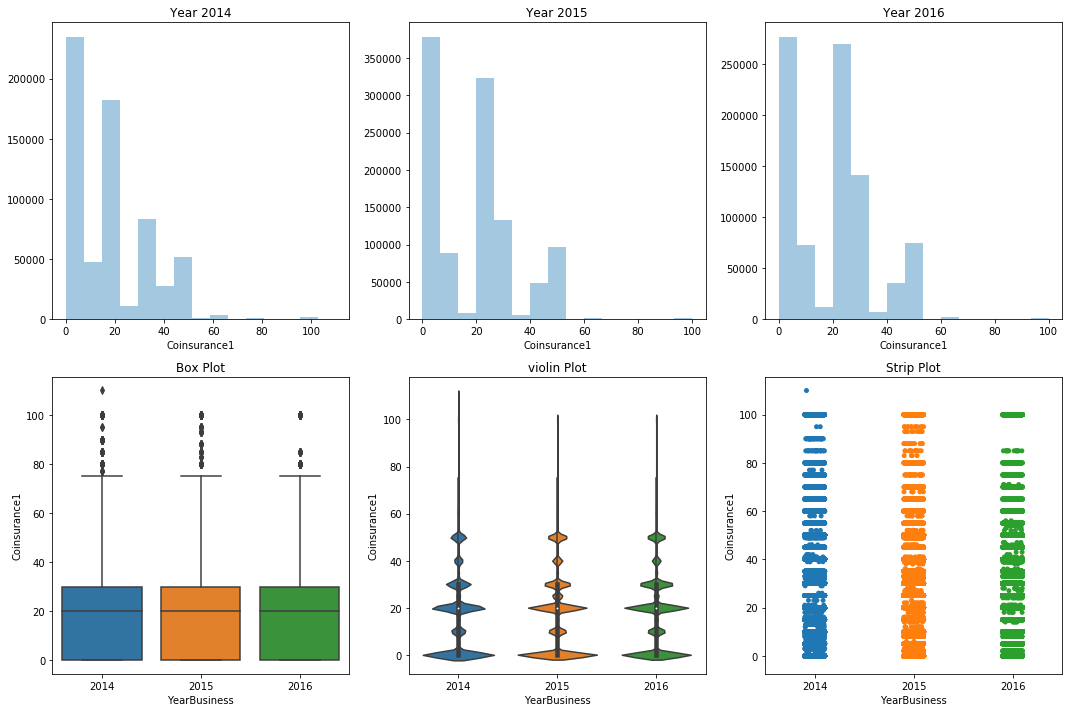

In [21]:
#sns.distplot(Codf['Coinsurance1'],kde=False,bins=15)

fig, ax = plt.subplots(figsize=(15,10), ncols=3, nrows=2)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .8     # the amount of width reserved for blank space between subplots
hspace =  1.5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

# The amount of space above titles
y_title_margin = 1.0

ax[0][0].set_title("Year 2014", y = y_title_margin)
ax[0][1].set_title("Year 2015", y = y_title_margin)
ax[0][2].set_title("Year 2016", y = y_title_margin)
ax[1][0].set_title("Box Plot", y = y_title_margin)
ax[1][1].set_title("violin Plot", y = y_title_margin)
ax[1][2].set_title("Strip Plot", y = y_title_margin)

sns.distplot(Codf[Codf['YearBusiness'] == 2014]['Coinsurance1'],kde=False,bins=15,ax=ax[0][0])
sns.distplot(Codf[Codf['YearBusiness'] == 2015]['Coinsurance1'],kde=False,bins=15,ax=ax[0][1])
sns.distplot(Codf[Codf['YearBusiness'] == 2016]['Coinsurance1'],kde=False,bins=15,ax=ax[0][2])
sns.boxplot(x='YearBusiness',y='Coinsurance1',data=Codf,ax=ax[1][0])
sns.violinplot(x='YearBusiness',y='Coinsurance1',data=Codf,ax=ax[1][1])
sns.stripplot(x='YearBusiness',y='Coinsurance1',data=Codf,jitter=True,ax=ax[1][2])
plt.tight_layout()

Another simple way to get yearwise Coinsurance distribution

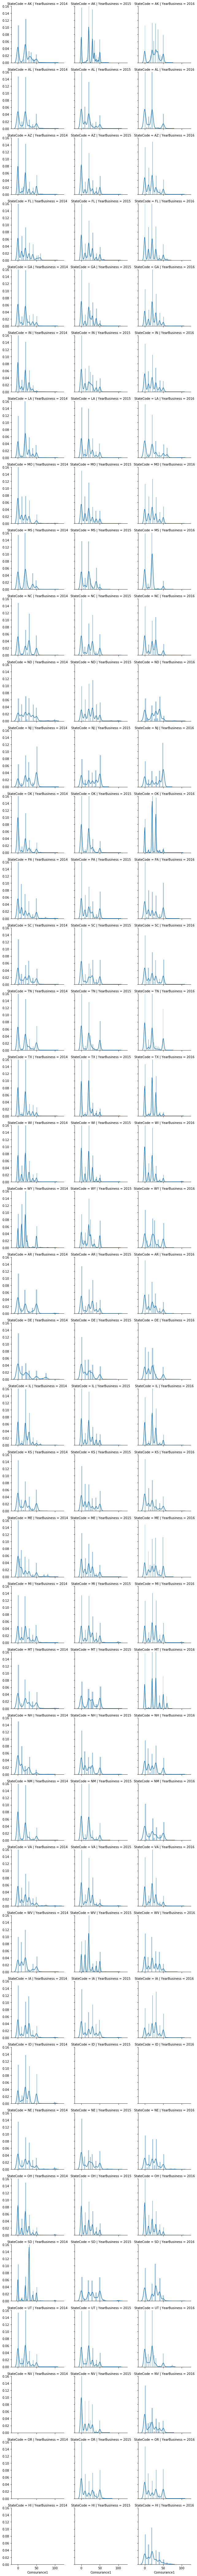

In [22]:
g = sns.FacetGrid(data=Codf,row='StateCode',col='YearBusiness')
g.map(sns.distplot,'Coinsurance1')

This kernel will remain in WIP status until I answer all the questions asked in the overview section.